# Exploratory Data Analysis (EDA)
## EDA with python and applying logistic regression

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [109]:
train = pd.read_csv('titanic.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Step 1 -> identify the missing data

In [16]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<Axes: >

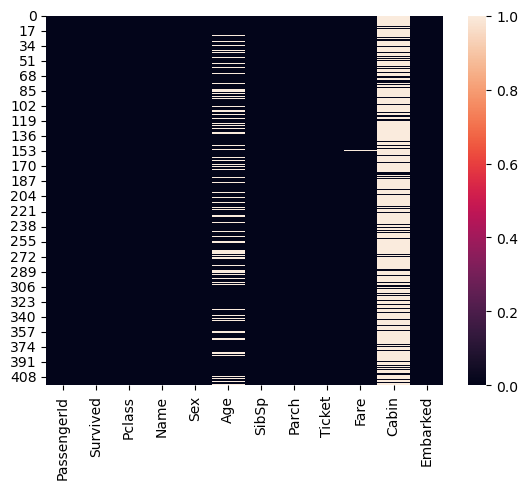

In [18]:
sns.heatmap(train.isnull())

<Axes: xlabel='Survived', ylabel='count'>

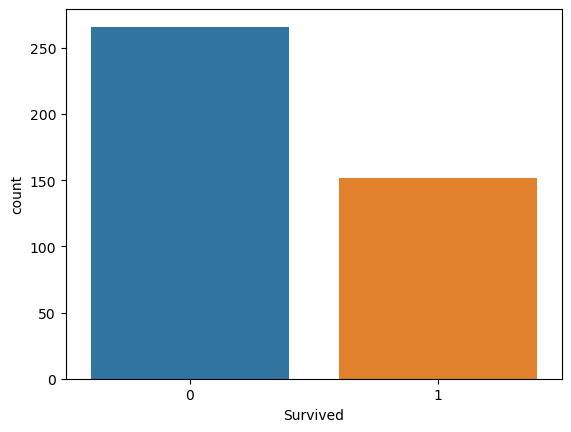

In [22]:
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

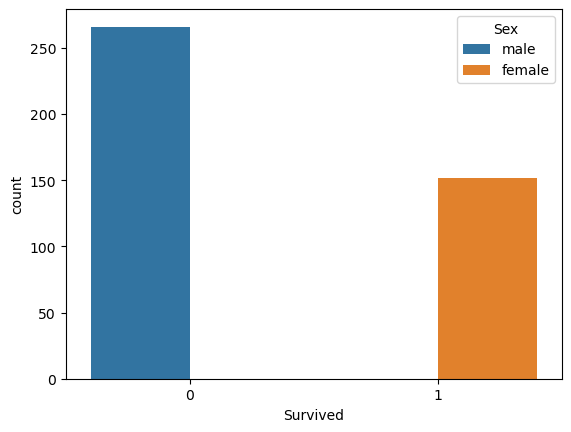

In [29]:
sns.countplot(data=train, x='Survived',hue='Sex')

In [43]:
print(train['Survived'].dtype)
print(train['Pclass'].dtype)

int64
int64


d:\Users\odins\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'int' object has no attribute 'startswith'

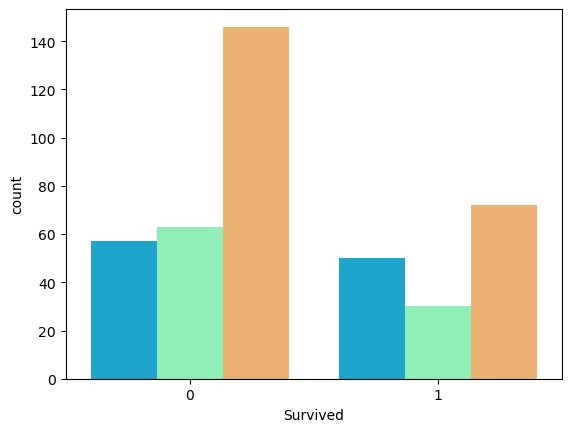

In [51]:
sns.countplot(data=train, x='Survived',hue='Pclass',palette='rainbow')

d:\Users\odins\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Pclass', ylabel='Age'>

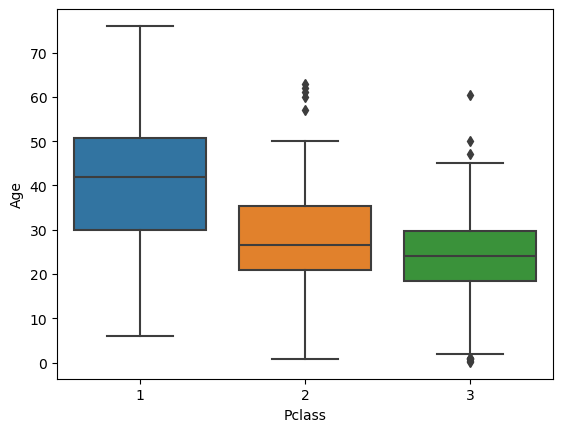

In [53]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [65]:
def immute_age(cols):
    age = cols.iloc[0]
    pclass = cols.iloc[1]
    if pd.isnull(age):
        if pclass == 1:
            return 41
        elif pclass == 2:
            return 28
        elif pclass == 3:
            return 24
    else:
        return age
            

In [111]:
train['Age'] = train[['Age','Pclass']].apply(immute_age,axis=1)

<Axes: >

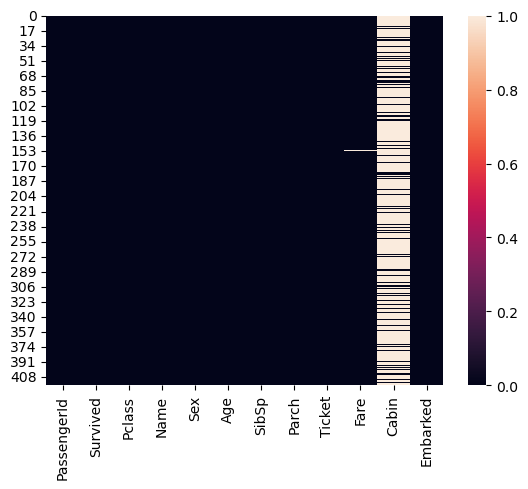

In [113]:
sns.heatmap(train.isnull())

<Axes: xlabel='Pclass', ylabel='Fare'>

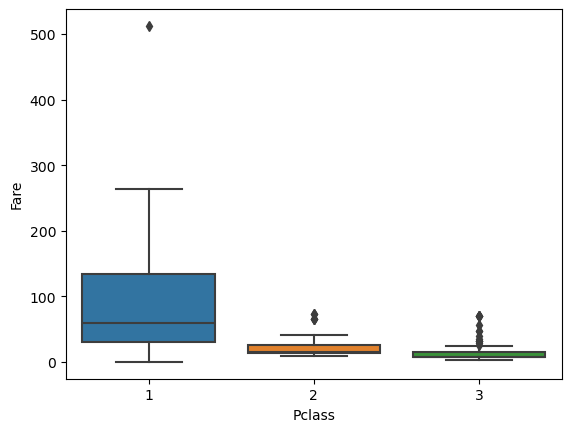

In [115]:
sns.boxplot(x='Pclass',y='Fare',data=train)

In [83]:
def immute_fare(cols):
    fare = cols.iloc[0]
    pclass = cols.iloc[1]
    if pd.isnull(fare):
        if pclass == 1:
            return 60
        elif pclass == 2:
            return 15
        elif pclass == 3:
            return 7
    else:
        return fare

In [117]:
train['Fare'] = train[['Fare','Pclass']].apply(immute_fare,axis=1)

<Axes: >

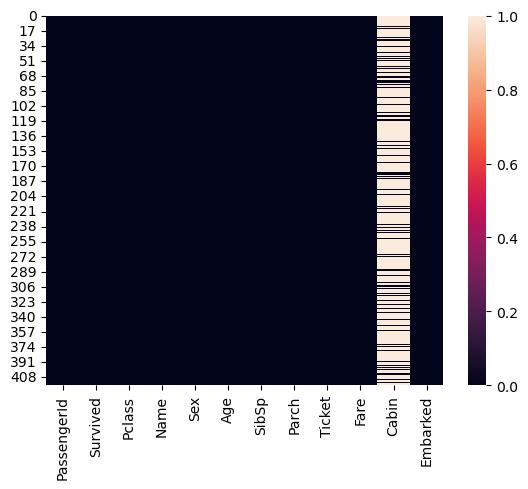

In [119]:
sns.heatmap(train.isnull())

In [121]:
train = train.drop('Cabin',axis=1)


In [125]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S


<Axes: >

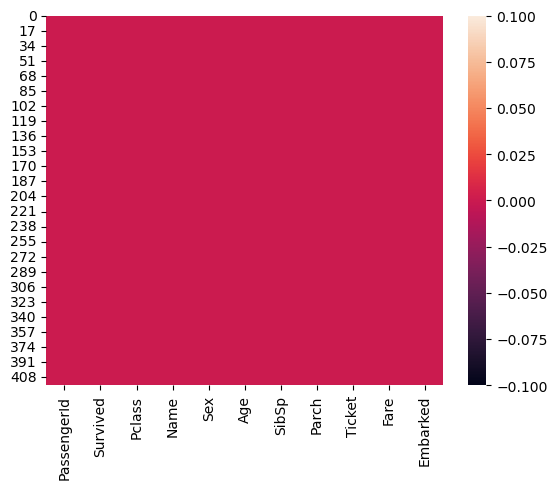

In [127]:
sns.heatmap(train.isnull())